In [39]:
import random
import gymnasium as gym
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import Callback
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
import matplotlib.pyplot as plt
from stable_baselines3.common.logger import configure

: 

In [ ]:
env = gym.make("CartPole-v1") # inport the cartpole environmetn (inverted pendulum)

states = env.observation_space.shape[0]
actions = env.action_space.n
model = Sequential()
model.add(Flatten(input_shape=(1,states)))
model.add(Dense(24,activation = "relu"))
model.add(Dense(24,activation = "relu"))
model.add(Dense(actions, activation ="linear"))

agent = DQNAgent(
    model = model,
    memory = SequentialMemory(limit = 50000, window_length = 1),
    policy= BoltzmannQPolicy(),
    nb_actions = actions,
    nb_steps_warmup =10,
    target_model_update = 0.01
)

agent.compile(optimizer=Adam(lr= 0.001), metrics =["mae"])
agent.fit(env , nb_steps = 100000, visualize=False, verbose=1)

In [ ]:
env = gym.make("CartPole-v1", render_mode='human')

num_episodes = 50
rewards = []

for episode in range(num_episodes):
    observation = env.reset()
    done = False
    episode_reward = 0
    
    while not done:
        action = agent.forward(observation)  # Choose action
        observation, reward, done, info = env.step(action)  # Step in the environment
        episode_reward += reward  # Accumulate rewards
        env.render()  # Render the environment for visualization
    
    rewards.append(episode_reward)  # Store the total reward for the episode
    print(f"Episode {episode + 1}: Total Reward: {episode_reward}")

# Close the environment
env.close()



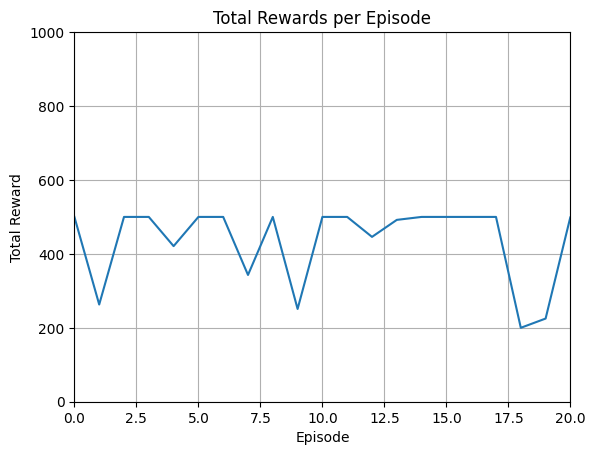

In [84]:
# Plotting the rewards over episodes
plt.plot(rewards)
plt.title("Total Rewards per Episode")
plt.xlabel("Episode")
plt.xlim(0,20)
plt.ylim(0,1000)
plt.ylabel("Total Reward")
plt.grid()
plt.show()